In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import numpy as np
from sklearn.decomposition import PCA
from numpy.random import rand
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [2]:
patients = pd.read_csv('../Data/standardized_patients.csv', index_col=0)
patients.shape

(153884, 17)

In [3]:
males = patients[patients['sex'] > 0]
males.drop(columns=['menopause','HRT'], axis=1, inplace=True)

/Users/erennio/.local/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [4]:
males.shape

(79177, 15)

In [5]:
rus = RandomUnderSampler(sampling_strategy=0.2, random_state=42)
X_resampled, y_resampled = rus.fit_resample(males.iloc[:,:males.shape[1]-1], males['Class'].values)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 620, 1: 124})


In [6]:
y = y_resampled

In [7]:
males_resampled = pd.DataFrame(X_resampled)
males_resampled['Class'] = y_resampled

In [14]:
tsne = TSNE(n_components=2, random_state=0, verbose=1).fit_transform(males_resampled.iloc[:,:males_resampled.shape[1]-1])


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 744 samples in 0.001s...
[t-SNE] Computed neighbors for 744 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 744 / 744
[t-SNE] Mean sigma: 1.003792
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.798477
[t-SNE] KL divergence after 1000 iterations: 1.196750


In [15]:
tsne

array([[ 15.847425 ,  13.131459 ],
       [ 14.008579 , -22.339123 ],
       [ -9.794913 , -28.508375 ],
       ...,
       [ 10.696727 ,  31.611477 ],
       [-20.542875 , -11.564475 ],
       [  4.6516976, -17.722992 ]], dtype=float32)

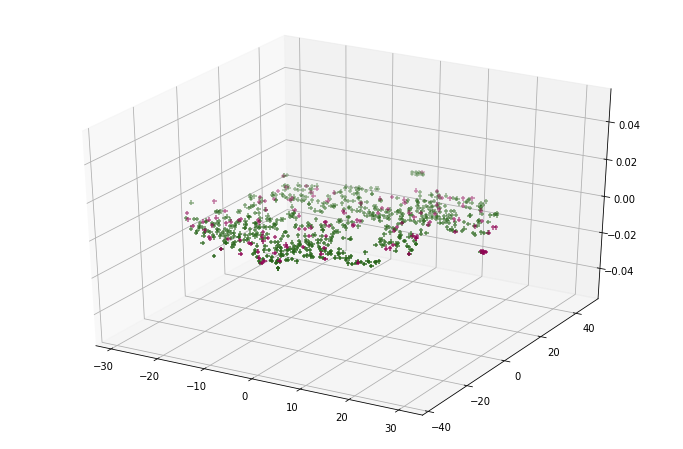

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne), c=y, cmap='PiYG_r', marker='+')
plt.show()